In [190]:
import pandas as pd 
import numpy as np 

from tensorflow import keras
import tensorflow as tf

import os

import soundfile as sf

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 

import librosa
import librosa.display

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
## RNN - Bidirectional LTSM (forward/backward)
### LTSM (Long Short Term Memory)

# model - Sequential()
# model.add(LTSM(128))
# model.add(Dense(n_class, softmax))

# memory = gated rnns (hidden state)

In [3]:
# get information for rnn from melspectogram

In [111]:
y, sr = librosa.load('/Users/kellyjara/Desktop/Project 5 (copy)/Data/genres_original/jazz/jazz_11.wav')

mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft =1024, win_length = n_fft,
                                          hop_length = 256, n_mels = 138)

In [118]:
y

array([ 0.09569635,  0.05452875, -0.09993939, ...,  0.43043715,
        0.40674227,  0.35309538], dtype=float32)

In [113]:
mel_spec.shape

(138, 2584)

In [112]:
melspec_df = pd.DataFrame(mel_spec)
melspec_df

,0,1,2,3,4,5,6,7,8,9,...,2574,2575,2576,2577,2578,2579,2580,2581,2582,2583
0,2.767703,1.256610,0.049260,0.079844,0.047800,0.027204,0.035284,0.092751,0.033658,0.087867,...,0.066821,0.112373,0.127000,0.225233,0.270547,0.149527,0.105926,0.082157,0.079817,1.107983
1,4.696153,4.969336,2.131524,1.402394,0.878734,1.475588,1.581236,1.592683,0.904518,1.422567,...,2.809259,2.776026,3.165994,4.196388,4.126279,3.139761,2.830846,2.375498,1.580870,3.386095
2,5.517553,13.391010,7.683267,5.333868,6.163404,8.828700,8.149593,5.839573,5.867539,8.901573,...,8.614573,8.160959,10.255269,11.472978,10.042929,9.227638,8.505672,8.085925,5.223974,4.385552
3,3.681101,10.694141,4.861880,4.566051,7.481699,10.397968,7.687128,3.890436,7.126028,10.064021,...,4.475569,4.226038,5.670397,7.492643,4.342639,4.862250,4.193801,6.897908,3.152003,2.662466
4,1.652678,2.962504,0.863914,1.215395,1.189772,2.486511,1.016630,0.384880,3.052526,7.381747,...,4.130633,6.908177,8.801167,12.533276,3.853016,0.594749,0.351353,6.597492,9.335791,5.007697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.000345,0.001392,0.001363,0.001263,0.001285,0.000626,0.000540,0.000996,0.000806,0.000428,...,0.001135,0.000713,0.000415,0.000385,0.000429,0.000351,0.000300,0.000385,0.000294,0.000606
134,0.000702,0.000709,0.000378,0.000728,0.001342,0.000796,0.001150,0.001143,0.000840,0.000547,...,0.002144,0.001211,0.001178,0.002383,0.002864,0.001409,0.001358,0.000661,0.000309,0.000641
135,0.000264,0.000384,0.000154,0.000143,0.000291,0.000325,0.000540,0.000455,0.000186,0.000222,...,0.000733,0.000946,0.000888,0.000582,0.000756,0.000806,0.000608,0.000227,0.000158,0.000557
136,0.000329,0.000601,0.000341,0.000191,0.000166,0.000347,0.000510,0.000288,0.000122,0.000239,...,0.000141,0.000245,0.000205,0.000191,0.000301,0.000328,0.000204,0.000087,0.000072,0.000552


[Text(0.5, 1.0, 'Mel-Frequency Spectrogram')]

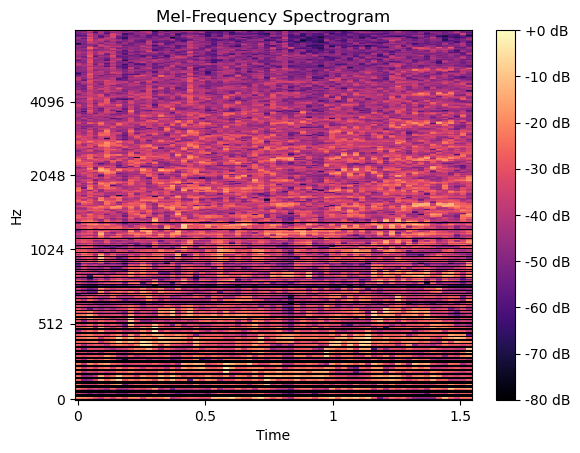

In [109]:
# Jazz Audio

J = librosa.feature.melspectrogram(y=y, sr=sr, n_fft =1024, win_length = n_fft,
                                   hop_length = 256, n_mels = 128)
fig, ax = plt.subplots()
s_db = librosa.power_to_db(S, ref = np.max)
img = librosa.display.specshow(s_db, x_axis = 'time',
                               y_axis= 'mel', sr=sr,
                               fmax = 8000, ax=ax)
fig.colorbar(img, ax=ax, format = '%+2.0f dB')
ax.set(title = 'Mel-Frequency Spectrogram')

In [104]:
# Rock Audio
y, sr = librosa.load('/Users/kellyjara/Desktop/Project 5 (copy)/Data/genres_original/rock/rock_40.wav')


[Text(0.5, 1.0, 'Mel-Frequency Spectrogram')]

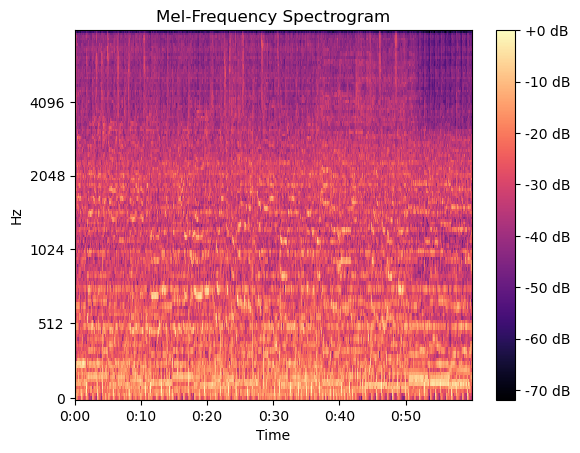

In [108]:
R = librosa.feature.melspectrogram(y=y, sr=sr, n_fft =1024, win_length = n_fft,
                                   hop_length = 256, n_mels = 128)
fig, ax = plt.subplots()
s_db = librosa.power_to_db(R, ref = np.max)
img = librosa.display.specshow(s_db, x_axis = 'time',
                               y_axis= 'mel', sr=sr,
                               fmax = 8000, ax=ax)
fig.colorbar(img, ax=ax, format = '%+2.0f dB')
ax.set(title = 'Mel-Frequency Spectrogram')

In [96]:
#Classical Audio 
y, sr = librosa.load('/Users/kellyjara/Desktop/Project 5 (copy)/Data/genres_original/classical/classical_33.wav')

[Text(0.5, 1.0, 'Mel-Frequency Spectrogram')]

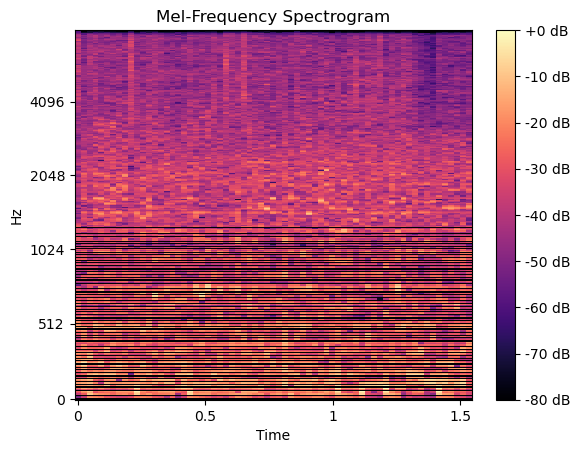

In [110]:
C = librosa.feature.melspectrogram(y=y, sr=sr, n_fft =1024, win_length = n_fft,
                                   hop_length = 10000, n_mels = 500)
fig, ax = plt.subplots()
s_db = librosa.power_to_db(C, ref = np.max)
img = librosa.display.specshow(s_db, x_axis = 'time',
                               y_axis= 'mel', sr=sr,
                               fmax = 8000, ax=ax)
fig.colorbar(img, ax=ax, format = '%+2.0f dB')
ax.set(title = 'Mel-Frequency Spectrogram')

In [150]:
### creating function for processing audio files into melspec features
def melspec_features(audio_path, n_mels=128, n_frames=5, n_fft = 1024):
    #loading audio file
    y, sr = librosa.load(audio_path)  
    #creating melspec feature
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft = n_fft, win_length = n_fft,
                                          hop_length = 256, n_mels = n_mels)
    #normalizing mel spectrogram
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    
    #pad/truncating to ensure all audio samples have the same length prior to running through the model
    mel_spectrogram = np.pad(mel_spectrogram, ((0, 0), (0, max(0, n_frames - mel_spectrogram.shape[1]))), 
                             mode='constant')
    mel_spectrogram = mel_spectrogram[:, :n_frames]
    
    return mel_spectrogram

In [119]:
#melspec = load_and_preprocess_audio('path_to_your_audio_file.wav')

In [162]:
# Function to load and preprocess audio files for different genres
def load_audio_files(data_dir, genres, n_mels=128, n_frames=5):
    all_mel_spectrograms = []
    all_labels = []

    for genre_index, genre in enumerate(genres):
        genre_dir = os.path.join(data_dir, genre)
        audio_files = os.listdir(genre_dir)

        for audio_file in audio_files:
            audio_path = os.path.join(genre_dir, audio_file)
            
            # Check if the file is an audio file
            if os.path.isfile(audio_path) and audio_file.lower().endswith(('.wav', '.mp3', '.flac')):
                mel_spectrogram = melspec_features(audio_path, n_mels=n_mels, n_frames=n_frames)

                # Append the mel spectrogram and the genre label to the lists
                all_mel_spectrograms.append(mel_spectrogram)
                all_labels.append(genre_index)  # Use the index of the genre as the label

    # Convert the lists to numpy arrays
    all_mel_spectrograms = np.array(all_mel_spectrograms)
    all_labels = np.array(all_labels)

    return all_mel_spectrograms, all_labels

In [163]:
data_dir = '/Users/kellyjara/Desktop/Project 5 (copy)/Data/genres_original'
genres = ['blues', 'classical', 'country', 'disco','hiphop', 'jazz','metal', 'pop', 'reggae', 'rock']

# Load audio files and labels
all_mel_spectrograms, all_labels = load_audio_files(data_dir, genres)

In [164]:
all_mel_spectrograms

array([[[-25.982319 , -30.268494 , -28.64195  , -24.18647  ,
         -23.689074 ],
        [-23.195715 , -22.075165 , -21.256071 , -18.925438 ,
         -15.796728 ],
        [-22.427536 , -20.133064 , -21.248232 , -21.931038 ,
         -15.810883 ],
        ...,
        [-66.562355 , -63.634583 , -63.83883  , -64.75747  ,
         -67.47143  ],
        [-68.48914  , -67.72832  , -67.52072  , -67.70147  ,
         -70.10828  ],
        [-76.96918  , -79.2419   , -78.61767  , -75.442    ,
         -77.43938  ]],

       [[-48.011013 , -52.37565  , -54.626984 , -61.228485 ,
         -51.46859  ],
        [-42.71254  , -43.014717 , -45.285187 , -47.629826 ,
         -42.49186  ],
        [-40.09877  , -36.41373  , -41.223183 , -43.759697 ,
         -41.260433 ],
        ...,
        [-80.       , -80.       , -80.       , -80.       ,
         -80.       ],
        [-80.       , -80.       , -80.       , -80.       ,
         -80.       ],
        [-80.       , -80.       , -80.       , 

In [165]:
all_labels

array([0, 0, 0, ..., 9, 9, 9])

In [178]:
reshaped_mel_spectrograms = [mel_spectrogram.ravel() for mel_spectrogram in all_mel_spectrograms]

# Convert reshaped_mel_spectrograms to a list of pandas Series
spectrogram_series = [pd.Series(mel_spectrogram) for mel_spectrogram in reshaped_mel_spectrograms]

# Create a DataFrame by concatenating the spectrogram_series and all_labels
df = pd.concat([pd.DataFrame(spectrogram_series), pd.Series(all_labels, name='label')], axis=1)

In [179]:
df

,0,1,2,3,4,5,6,7,8,9,...,631,632,633,634,635,636,637,638,639,label
0,-25.982319,-30.268494,-28.641951,-24.186470,-23.689074,-23.195715,-22.075165,-21.256071,-18.925438,-15.796728,...,-67.728317,-67.520721,-67.701469,-70.108276,-76.969177,-79.241898,-78.617668,-75.442001,-77.439377,0
1,-48.011013,-52.375648,-54.626984,-61.228485,-51.468590,-42.712540,-43.014717,-45.285187,-47.629826,-42.491859,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,0
2,-44.178696,-48.330750,-48.501480,-49.973915,-52.151993,-40.550011,-42.519550,-45.314095,-46.529175,-47.168266,...,-77.978516,-80.000000,-76.165359,-66.555450,-80.000000,-80.000000,-80.000000,-80.000000,-77.727066,0
3,-23.431141,-29.868347,-25.187542,-18.704500,-16.482071,-16.492300,-15.970642,-10.922288,-8.553658,-8.263035,...,-68.035255,-68.789673,-64.859116,-65.544815,-75.106003,-76.789902,-77.344643,-77.494690,-76.970436,0
4,-22.725464,-24.454298,-25.663452,-25.943607,-26.174402,-20.843529,-18.339556,-17.867718,-17.879223,-18.278442,...,-76.335632,-80.000000,-80.000000,-80.000000,-76.277740,-80.000000,-80.000000,-80.000000,-80.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,-23.112736,-22.643114,-28.806219,-32.430580,-33.446033,-18.530178,-17.673958,-22.485741,-18.928930,-17.580952,...,-48.807663,-47.043365,-47.110779,-46.046341,-61.092377,-59.099739,-55.625328,-55.836014,-59.788452,9
1728,-17.258358,-18.299168,-23.671265,-18.116428,-18.313721,-12.197538,-10.684406,-13.509636,-10.270466,-11.253586,...,-60.954861,-57.223553,-55.597778,-58.656212,-74.454025,-72.269974,-71.680588,-69.710846,-71.803062,9
1729,-30.277416,-30.808739,-38.784580,-41.964714,-33.473129,-32.249454,-26.928059,-28.160076,-29.544243,-26.426250,...,-76.866348,-80.000000,-80.000000,-80.000000,-70.969025,-77.143158,-80.000000,-80.000000,-80.000000,9
1730,-17.000790,-16.233004,-17.720884,-17.645161,-18.347282,-9.865099,-5.221270,-4.441788,-4.889742,-6.101233,...,-57.403229,-57.679558,-57.806625,-59.328491,-62.452126,-62.002090,-60.812431,-61.503265,-61.333801,9


In [182]:
df['label'].value_counts()

0    206
2    204
4    201
7    201
9    200
6    191
1    137
3    136
8    133
5    123
Name: label, dtype: int64

In [184]:
X = df.drop('label', axis=1).values
y = df['label'].values

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(units=10, activation='softmax')
])


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


Epoch 1/10


ValueError: in user code:

    File "/Users/kellyjara/anaconda3/envs/meowranda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/Users/kellyjara/anaconda3/envs/meowranda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/kellyjara/anaconda3/envs/meowranda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/Users/kellyjara/anaconda3/envs/meowranda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "/Users/kellyjara/anaconda3/envs/meowranda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/kellyjara/anaconda3/envs/meowranda/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Input 0 of layer "lstm_4" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 640)
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 640), dtype=float32)
      • training=True
      • mask=None
